In [79]:
import pandas as pd 

In [80]:
shopping=pd.read_csv('Data/Shooping.csv')
Food=pd.read_csv('Data/Food.csv')
Medical=pd.read_csv('Data/Medicals.csv')
Grocery=pd.read_csv('Data/Grocery.csv')


In [81]:
shopping.head()

,Name,Longitude,Lattitude,Target
0,A STAR FASHION BOUTIQUE,19.384304,72.827793,Shopping
1,Asuntha Tailoring & Alterations,19.385840,72.828644,Shopping
2,Glam By Neha Fashion,19.383251,72.828317,Shopping
3,U.S. Polo Assn.\r,19.382892,72.828638,Shopping
4,Levi's Exclusive Store-Vasai,19.382819,72.828690,Shopping


In [82]:
Medical.head()

,Name,Longitude,Lattitude,Target
0,sunshine chemist,19.392071,72.825792,Medical
1,G.S pharmacy vasai,19.388913,72.830426,Medical
2,Rathod chemist,19.384375,72.833049,Medical
3,Micro chemist,19.381461,72.831772,Medical
4,Shree bhavni chemist,19.377231,72.829396,Medical


In [83]:
Grocery.head()

,Name,address,Longitude,Lattitude,Target
0,Jalaram Kirana Stores,"Shop Number 1,2, Vishwakarma Paradise, Ambadi ...",19.383820,72.827441,Grocery
1,Vedika Kirana And General Store,"Shop No.02 Lourds B Co op Hsg Society, Pareira...",19.385399,72.824515,Grocery
2,Vardhman Grain Stores,"1, Guruprasad Apartment, Ambadi Circle, Veer S...",19.381146,72.829525,Grocery
3,J J Store,"Shop No 1, Dindayal Nagar, Vasai West, Vasai-V...",19.381672,72.828753,Grocery
4,Nyra Mini Market,"Shop No. 6&7, Dream House, Vasai Rd E, opp. K....",19.381956,72.827817,Grocery


In [84]:
Food.head()

,Name,Longitude,Lattitude,Target
0,Nature's Fuel & Foodzone,19.383923,72.829269,Food
1,Pic A Bite - Vartak Branch,19.383862,72.829265,Food
2,Chai Nation,19.384235,72.829568,Food
3,Souffle Cake Shop Vasai station,19.383440,72.830434,Food
4,Ross exotic,19.383402,72.830422,Food


In [85]:
new_grocery=Grocery.drop(['address'],axis=1)

In [86]:
df=pd.concat([new_grocery,shopping,Food,Medical],axis=0)

In [87]:
df

,Name,Longitude,Lattitude,Target
0,Jalaram Kirana Stores,19.383820,72.827441,Grocery
1,Vedika Kirana And General Store,19.385399,72.824515,Grocery
2,Vardhman Grain Stores,19.381146,72.829525,Grocery
3,J J Store,19.381672,72.828753,Grocery
4,Nyra Mini Market,19.381956,72.827817,Grocery
...,...,...,...,...
19,Maharashtra medio,19.381074,72.832021,Medical
20,Prajapati medical,19.381796,72.832041,Medical
21,sunshine chemist,19.381796,72.832041,Medical
22,VVSB Ushakiranmedical And General Store,19.391736,72.826589,Medical


In [88]:
df.columns

Index(['Name ', 'Longitude', 'Lattitude', 'Target'], dtype='object')

In [89]:
def get_name(data):
  for x in data:
   names = x['Name '] 
  for x in data:
   target =x['Target'] 
  return names , target

In [90]:
df_new=df.drop(['Longitude', 'Lattitude'],axis=1)

In [91]:
names, target= get_name(df_new)

TypeError: string indices must be integers

In [92]:
names[0],target[0]

(<generator object get_name.<locals>.<genexpr> at 0x0000025803566430>,
 <generator object get_name.<locals>.<genexpr> at 0x00000258036900B0>)

In [93]:
a=df['Name ']

In [94]:
a[2]

2    Vardhman Grain Stores
2     Glam By Neha Fashion
2              Chai Nation
2           Rathod chemist
Name: Name , dtype: object

In [95]:
x=df['Name ']
y=df['Target']

In [96]:
x


0                       Jalaram Kirana Stores
1             Vedika Kirana And General Store
2                       Vardhman Grain Stores
3                                   J J Store
4                            Nyra Mini Market
                       ...                   
19                         Maharashtra medio 
20                        Prajapati  medical 
21                          sunshine chemist 
22    VVSB Ushakiranmedical And General Store
23                           Parizad medical 
Name: Name , Length: 110, dtype: object

In [97]:
y

0     Grocery
1     Grocery
2     Grocery
3     Grocery
4     Grocery
       ...   
19    Medical
20    Medical
21    Medical
22    Medical
23    Medical
Name: Target, Length: 110, dtype: object

In [98]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.3)

In [99]:
xtrain[1],ytrain[1]

(1         Pic A Bite - Vartak Branch
 1    Asuntha Tailoring & Alterations
 1                 G.S pharmacy vasai
 1    Vedika Kirana And General Store
 Name: Name , dtype: object,
 1        Food
 1    Shopping
 1     Medical
 1     Grocery
 Name: Target, dtype: object)

In [100]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [101]:
tokenizer = Tokenizer(num_words=10000 , oov_token='<UNK>')
tokenizer.fit_on_texts(xtrain)

In [116]:
tokenizer.texts_to_sequences(x[0])


[[131, 27, 11], [20, 1, 2, 88], [1, 1, 1], [55, 6]]

In [117]:
x[0]

0       Jalaram Kirana Stores
0     A STAR FASHION BOUTIQUE
0    Nature's Fuel & Foodzone
0           sunshine chemist 
Name: Name , dtype: object

In [128]:
import matplotlib.pyplot as plt

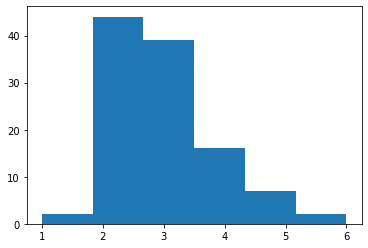

In [129]:
lengths =[len(t.split(' ')) for t in x]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [130]:
maxlen = 6
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
def get_sequences(tokenizer , names):
  seq = tokenizer.texts_to_sequences(names)
  padded = pad_sequences(seq, truncating='post', padding='post',maxlen=maxlen)
  return padded

In [132]:
padded_x=get_sequences(tokenizer,x)

In [133]:
padded_x

array([[131,  27,  11,   0,   0,   0],
       [151,  27,  28,   7,   3,   0],
       [  1,   1,  11,   0,   0,   0],
       [ 14,  14,   3,   0,   0,   0],
       [ 34,  35,  36,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0],
       [ 65,  23,   0,   0,   0,   0],
       [ 59,  11,   0,   0,   0,   0],
       [108, 109, 110,   0,   0,   0],
       [144,  23,   0,   0,   0,   0],
       [  1,  57,  22,   0,   0,   0],
       [ 24,  21,  67,   7,   3,   0],
       [ 83,  84,   0,   0,   0,   0],
       [102,   7,  11,   0,   0,   0],
       [ 44,  45,   1,  36,   0,   0],
       [ 51,   7,   3,   0,   0,   0],
       [  1,  27,   3,   0,   0,   0],
       [ 89,   7,  11,   0,   0,   0],
       [ 21,  56,  57,   0,   0,   0],
       [  1,   1,   1,  36,   0,   0],
       [ 20,   1,   2,  88,   0,   0],
       [126, 127, 128,   0,   0,   0],
       [ 71,  72,  73,   2,   0,   0],
       [ 79,  25,  80,  81,  82,   0],
       [  1,   1,   3,  10,   0,   0],
       [  1,   1,   0,   

In [134]:
classes = set(y)


In [135]:
classes

{'Food', 'Grocery', 'Medical', 'Shopping'}

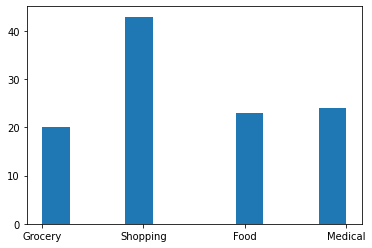

In [136]:
plt.hist(y, bins =11)
plt.show()

In [137]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class =dict((v,k) for k , v in class_to_index.items())

In [158]:
class_to_index

{'Food': 0, 'Shopping': 1, 'Medical': 2, 'Grocery': 3}

In [159]:
index_to_class

{0: 'Food', 1: 'Shopping', 2: 'Medical', 3: 'Grocery'}

In [139]:
import numpy as np

In [140]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])


In [141]:
train_labels=names_to_ids(y)


In [142]:
train_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [143]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(padded_x,train_labels,random_state=4,test_size=0.3)

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF=RandomForestClassifier()

In [155]:
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [156]:
ypred=RF.predict(xtest)

In [157]:
accuracy_score(ytest,ypred)

0.5151515151515151